# K-Means Clustering

## Problem Statement

**Objective :** Create customer segments by understanding their purchase behaviour for an online retail business.

**Algorithm:**
K-means Clustering Technique Applied for product segmentation for effective Inventory Management

**Conclusions:**

The model gives us some great insights by segmenting multiple products into different categories for a retail company with similar/cyclical buying pattern over a period of 1 year. This can help us the retail shop manage their inventory better thereby lowering costs and raising revenue by placing the orders in synchornized with the buying cycles.

**Dataset Description:**

This dataset consists of is a weekly sales data of 54,000+ rows of data for for a global retail company with 8 attributes (qualitative and quantitative).

## Importing libraries

In [1]:
#supress warnings
import warnings
warnings.filterwarnings('ignore')

#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/learning-data/OnlineRetail.csv


## Loading dataset

In [3]:
# Importing all datasets
df = pd.read_csv('/kaggle/input/learning-data/OnlineRetail.csv', encoding= 'ISO-8859-1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [4]:
print('df shape: {}\n'.format(df.shape))
print('No. of missing values in df:')
print((100*(df.isna().sum())/(df.shape[0])).round(2))

df shape: (541909, 8)

No. of missing values in df:
InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.93
Country         0.00
dtype: float64


In [5]:
#droping 24% of missing values from df
df.dropna(inplace= True)
print('No. of missing values in df:\n')
print((100*(df.isna().sum())/(df.shape[0])).round(2))

No. of missing values in df:

InvoiceNo      0.0
StockCode      0.0
Description    0.0
Quantity       0.0
InvoiceDate    0.0
UnitPrice      0.0
CustomerID     0.0
Country        0.0
dtype: float64


In [6]:
df.shape

(406829, 8)

### clustering Analysis
- Behavioural clustering
- Attitudinal clustering
- Geographical clustering

Now we are using, Behavioural clutering (RFM approach).
#### RFM analysis
considering, 
1 Recency.
2 Frequency.
3 Monetory Value.

## Data Preperation

Generally Qty will be negative, if provided any discount. We will check is there any product with negative qty other than discount.

In [7]:
#products with negative qty, other than discount
len= df[(df.Quantity < 0) & (df.StockCode != 'D')].shape[0]
print(len,'\n')
df[(df.Quantity < 0) & (df.StockCode != 'D')][:4]

8828 



,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,01-12-2010 09:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,01-12-2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,01-12-2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,01-12-2010 10:24,0.29,17548.0,United Kingdom


**Observation:**
* There are 8828 invoices with Negative qty and not in discount StockCode.
* This may be due to manual error, so we ll do negative to positive convertion.

In [8]:
#value convertion.
index= list(df[(df.Quantity < 0) & (df.StockCode != 'D')].index)
df.loc[index,'Quantity'] = df.loc[index,'Quantity'] * -1
df[(df.Quantity < 0) & (df.StockCode != 'D')].shape

(0, 8)

In [9]:
#creating new var 'amount'
df['amount']= df.Quantity * df.UnitPrice
df[:4]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34


### Monetory Value

In [10]:
#Monetory value
df_cust= df.groupby(by='CustomerID')['amount'].sum()
df_cust= df_cust.reset_index()
df_cust.CustomerID= df_cust.CustomerID.astype('int64')
print('shape of df_cust is: {}\n'.format(df_cust.shape))
df_cust[:4]

shape of df_cust is: (4372, 2)



,CustomerID,amount
0,12346,154367.20
1,12347,4310.00
2,12348,1797.24
3,12349,1757.55


### Frequency

In [11]:
#frequency
df_freq= df.groupby(by='CustomerID')['InvoiceNo'].count()
df_freq= df_freq.reset_index()
df_freq.columns= ['CustomerID','Frequency']
df_freq.CustomerID= df_freq.CustomerID.astype('int64')
print('shape of df_freq is: {}\n'.format(df_cust.shape))
df_freq[:4]

shape of df_freq is: (4372, 2)



,CustomerID,Frequency
0,12346,2
1,12347,182
2,12348,31
3,12349,73


In [12]:
#merging monetory value and frequency.
df_con1= pd.merge(right= df_cust, left= df_freq, on= 'CustomerID', how= 'inner')
df_con1[:4]

,CustomerID,Frequency,amount
0,12346,2,154367.20
1,12347,182,4310.00
2,12348,31,1797.24
3,12349,73,1757.55


In [13]:
df.InvoiceDate.dtype

dtype('O')

In [14]:
#converting data type of InvoiceDate to time format.
df.InvoiceDate= pd.to_datetime(df.InvoiceDate, format= '%d-%m-%Y %H:%M')
df[:4]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [15]:
#last invoice date
df.InvoiceDate.max()

Timestamp('2011-12-09 12:50:00')

To find recency we need to first compute diff days from last date.

In [16]:
#computing diff days
df['days_difference']= df['InvoiceDate'].max() - df['InvoiceDate']
df[:4]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount,days_difference
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00


### Recency

In [17]:
#recency
import datetime as dt

df_rec= df.groupby(by='CustomerID')['days_difference'].min()
df_rec= df_rec.reset_index()
df_rec.columns= ['CustomerID','recency_days']
df_rec.CustomerID= df_rec.CustomerID.astype('int64')

#extracting only days
df_rec.recency_days= df_rec.recency_days.dt.days
print('shape of df_rec is: {}\n'.format(df_rec.shape))
df_rec[:4]

shape of df_rec is: (4372, 2)



,CustomerID,recency_days
0,12346,325
1,12347,1
2,12348,74
3,12349,18


In [18]:
#merging Recency, Frequency, Monetory Value
df_RFA= pd.merge(right= df_con1, left= df_rec, on= 'CustomerID', how= 'inner')
df_RFA= pd.DataFrame(df_RFA)
df_RFA[:4]

,CustomerID,recency_days,Frequency,amount
0,12346,325,2,154367.20
1,12347,1,182,4310.00
2,12348,74,31,1797.24
3,12349,18,73,1757.55


Let the above df be our final df for **RFA analysis**

### Outlier analysis

In [19]:
df_RFA[['recency_days', 'Frequency', 'amount']].describe(percentiles=[0.25,0.5,0.75,0.95,0.99]).round(2)

,recency_days,Frequency,amount
count,4372.00,4372.00,4372.00
mean,91.05,93.05,2175.52
std,100.77,232.47,10492.89
min,0.00,1.00,0.00
25%,16.00,17.00,308.57
50%,49.00,42.00,677.98
75%,142.00,102.00,1696.28
95%,312.00,317.90,5969.24
99%,368.00,671.87,20724.91
max,373.00,7983.00,336942.10


In [20]:
#defining function for plotting outliers
def outlier_analysis(col, index):
  plt.subplot(1,3,index)
  sns.boxplot(df_RFA[col])
  plt.title('dist of {}'.format(col), color= 'g')

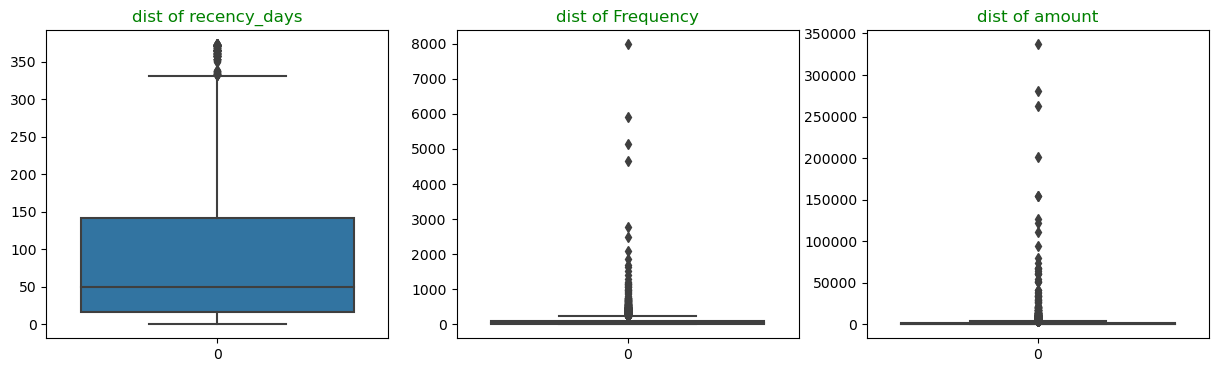

In [21]:
#iterating the outlier analysis function
cols= ['recency_days', 'Frequency', 'amount']
plt.figure(figsize=[15,4])
for i in enumerate(cols):
  outlier_analysis(i[1], i[0]+1)
plt.show()

**Observation:**
* Distribution of `frequency` and `amount` is heavily squed.
* We will decide an optimum level to filter outliers based on bussiness consideration.
* Dropping all outliers will not be good approach, say in case of `Amount` there may be customers will sum of all bills above 2 Lakhs.
 * So we will cap the customers between 5th and 99th percentile values and check the distribution.

In [22]:
#customers b/w 5th and 99th percentile value.
for i in cols:
  df_RFA= df_RFA[df_RFA[i] <= df_RFA[i].quantile(0.99)]
df_RFA= df_RFA.reset_index(drop=True)
df_RFA.shape

(4244, 4)

In [23]:
#checking distribution of values
df_RFA[['recency_days', 'Frequency', 'amount']].describe(percentiles=[0.25,0.5,0.75,0.95,0.99]).round(2)

,recency_days,Frequency,amount
count,4244.00,4244.00,4244.00
mean,89.89,77.11,1358.91
std,97.66,97.19,1900.40
min,0.00,1.00,0.00
25%,17.00,17.00,308.30
50%,49.50,41.00,668.12
75%,140.00,98.00,1610.74
95%,304.85,284.00,5026.34
99%,361.00,480.14,10196.26
max,368.00,671.00,16507.24


ok now it seems that the datapoints are not so skewed based on percentile values.

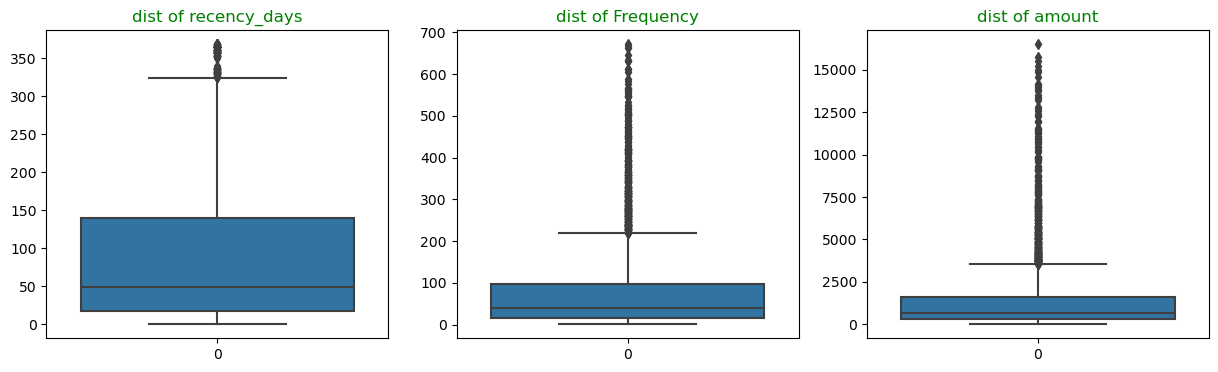

In [24]:
#plotting again to check distribution of values
plt.figure(figsize=[15,4])
for i in enumerate(cols):
  outlier_analysis(i[1], i[0]+1)
plt.show()

## Feature scaling

In [25]:
#scaling
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()
df_RFA_scaled= df_RFA[['recency_days', 'Frequency','amount']]
df_RFA_scaled= scaler.fit_transform(df_RFA_scaled)

#converting into dataframe
df_RFA_scaled = pd.DataFrame(df_RFA_scaled, columns=['recency_days', 'Frequency','amount'])
df_RFA_scaled[:4]

,recency_days,Frequency,amount
0,-0.910297,1.079299,1.553063
1,-0.162699,-0.474517,0.230680
2,-0.736199,-0.042329,0.209793
3,2.243952,-0.618579,-0.539164


In [26]:
#standardisation check
df_RFA_scaled.describe().round(4)

,recency_days,Frequency,amount
count,4244.0000,4244.0000,4244.0000
mean,0.0000,-0.0000,-0.0000
std,1.0001,1.0001,1.0001
min,-0.9205,-0.7832,-0.7151
25%,-0.7464,-0.6186,-0.5529
50%,-0.4136,-0.3716,-0.3635
75%,0.5132,0.2149,0.1325
max,2.8482,6.1112,7.9721


## Hopkin's Statistics
* Hopkin's statistics is used to check whether out data frame is usable / fit for clustering.
* The cvalue ranges between -1 to 1.
* where, 1 indicated `Highly usable`, -1 indicated `Unusable`

In [27]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan
 
def hopkins(X):
    d = X.shape[1] # columns
    n = X.shape[0] # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [28]:
print('Hopkins value for our dataset is: {}, which represents highly usable'.format(hopkins(df_RFA_scaled).round(3)))

Hopkins value for our dataset is: 0.951, which represents highly usable


## Model Building
we will first create models with random no. of clusters, finally we can bulit model with optimal parameters.

In [29]:
#model
from sklearn.cluster import KMeans

#instantiate with no. of clusters as 4.
kmeans= KMeans(n_clusters= 4, init= 'k-means++', max_iter=300)

#Fit the model
kmeans.fit(df_RFA_scaled)
kmeans.labels_

array([2, 0, 0, ..., 3, 0, 0], dtype=int32)

### Optimum parameters
selecting optimal parameters through,
* Sum of squared distance (SSD).
* silhouette Score.

In [30]:
#finding optimal number of clusters using SSD.
ssd=[]
n_clusters= [i for i in range(2,9)]
for cluster in n_clusters:
  kmeans= KMeans(n_clusters= cluster, init= 'k-means++', max_iter=300)
  kmeans.fit(df_RFA_scaled)
  ssd.append(kmeans.inertia_)

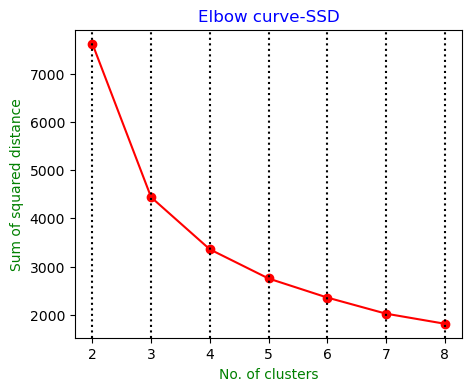

In [31]:
#Elbow curve
plt.figure(figsize=[5,4])
plt.plot(n_clusters, ssd, 'r',  marker= 'o', linestyle='-')
for i in n_clusters:
  plt.axvline(x=i, linestyle= 'dotted', color= 'k')
plt.xlabel('No. of clusters', color= 'g')
plt.ylabel('Sum of squared distance', color= 'g')
plt.title('Elbow curve-SSD', color='b')
plt.show()

**Observation:**
* Elbow curve is used to select optimum number of clusters.
* Usually SSD decreases with increase in number of clusters.
* Interpretation:
    * As elbow curve plots between SSD and number of clusters, cluster after which SSD reduction is significant is selected.
    * Here, Till No. of clusters as 3, the graph drops steaply, after 3, the drop in SSD becomes significant.
    So we will **choose 3 as optimum no. of clusters**.
    
    

In [32]:
#silhouette analysis
from sklearn.metrics import silhouette_score

#iteration
n_clusters= [i for i in range(2,9)]
silhouette_list=[] 
for cluster in n_clusters:
  kmeans= KMeans(n_clusters= cluster, init= 'k-means++', max_iter=300)
  kmeans.fit(df_RFA_scaled)
  cluster_label= kmeans.labels_

  #silhouette analysis
  silhouette= silhouette_score(df_RFA_scaled, cluster_label)
  silhouette_list.append(silhouette)
  print('For no. of cluster: {0}, silhouette score is: {1}'.format(cluster, silhouette.round(3)))

For no. of cluster: 2, silhouette score is: 0.537
For no. of cluster: 3, silhouette score is: 0.507
For no. of cluster: 4, silhouette score is: 0.487
For no. of cluster: 5, silhouette score is: 0.46
For no. of cluster: 6, silhouette score is: 0.415
For no. of cluster: 7, silhouette score is: 0.414
For no. of cluster: 8, silhouette score is: 0.392


* silhouette score is a measure of how close each point in one cluster is to points in the neighboring clusters.
* higher the silhouette score, better will be the model.
* Based on the score, No. of clusters as 3 looks optimal.

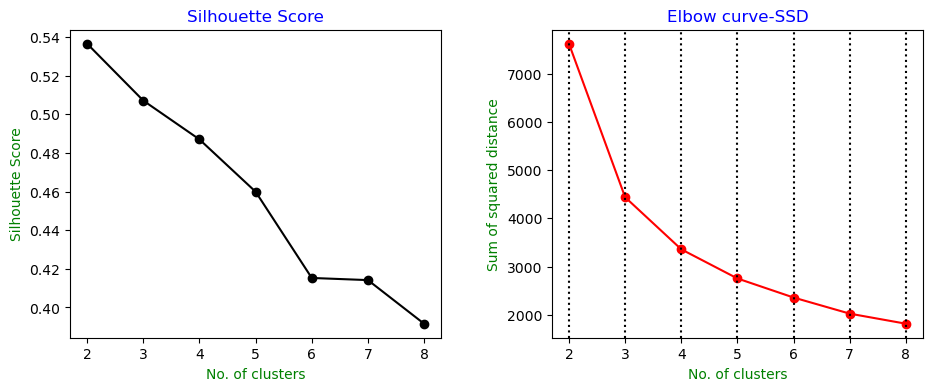

In [33]:
#plotting silhouette score and comparing with elbow curve
plt.figure(figsize=[11,4])
plt.subplot(1,2,1)
plt.plot(n_clusters, silhouette_list, marker='o', color= 'k')
plt.xlabel('No. of clusters', color= 'g')
plt.ylabel('Silhouette Score', color= 'g')
plt.title('Silhouette Score',color= 'b')

plt.subplot(1,2,2)
plt.plot(n_clusters, ssd, 'r',  marker= 'o', linestyle='-')
for i in n_clusters:
  plt.axvline(x=i, linestyle= 'dotted', color= 'k')
plt.xlabel('No. of clusters', color= 'g')
plt.ylabel('Sum of squared distance', color= 'g')
plt.title('Elbow curve-SSD', color='b')
plt.subplots_adjust(wspace=0.3)
plt.show()

## Final model
buliding our final model with No. of clusters as 3.

In [34]:
#optimal no. of clusters is 3
kmeans= KMeans(n_clusters= 3, init= 'k-means++', max_iter=300)

#modelbuilding
kmeans.fit(df_RFA_scaled)
kmeans.labels_

array([0, 1, 1, ..., 2, 1, 1], dtype=int32)

In [35]:
#adding cluster_id feature to RFA df.
df_RFA['cluster_id']= kmeans.labels_
df_RFA[:4]

,CustomerID,recency_days,Frequency,amount,cluster_id
0,12347,1,182,4310.00,0
1,12348,74,31,1797.24,1
2,12349,18,73,1757.55,1
3,12350,309,17,334.40,2


## Final Model Visualisation

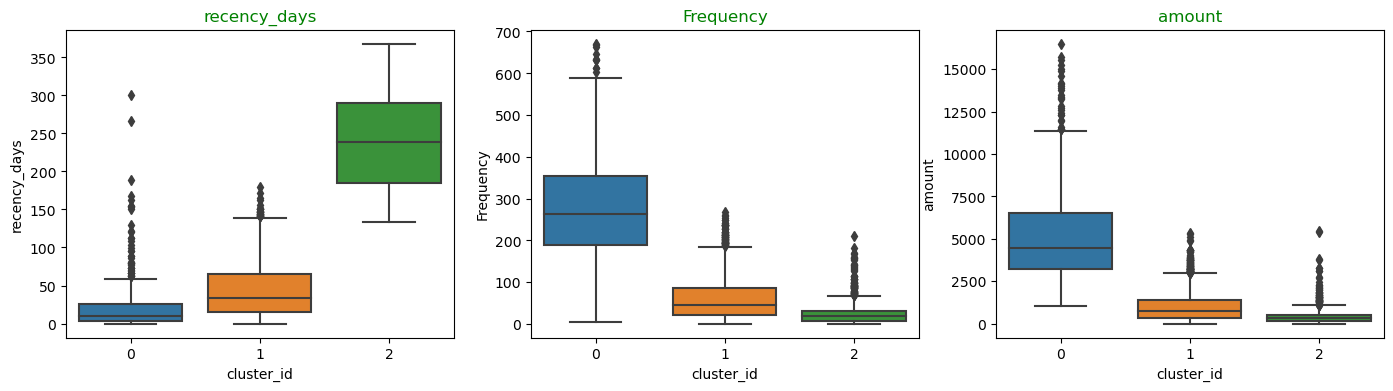

In [36]:
#Final cluster visualisation
plt.figure(figsize=[17,4])
cols= ['recency_days', 'Frequency', 'amount']
for i in enumerate(cols):
  plt.subplot(1,3,i[0]+1)
  sns.boxplot(x='cluster_id', y= i[1], data= df_RFA)
  plt.title(i[1], color= 'g')
plt.show()

**Final Cluster Observation:**
* **Cluster 0:**
    * Recency range: 0 to 25 days~
    * Frequency Range: 200 to 350 orders~
    * Amount range: 1,000 to 1,50,000 ~
* **Cluster 1:**
    * Recency range: 180 to 280 days~
    * Frequency Range: 0 to 25 orders~
    * Amount range: 10 to 2,500 ~
* **Cluster 2:**
    * Recency range: 0 to 50 days~
    * Frequency Range: 0 to 50 orders~
    * Amount range: 1,000 to 50,000 ~